In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Data source - "https://www.kaggle.com/datasets/bumba5341/advertisingcsv"

df = pd.read_csv('/content/drive/MyDrive/Internship/Advertising.csv')
df.head(4)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
df.shape

(200, 5)

In [44]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [45]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [46]:
df = df.drop('Unnamed: 0',axis=1)

<Axes: xlabel='TV', ylabel='Sales'>

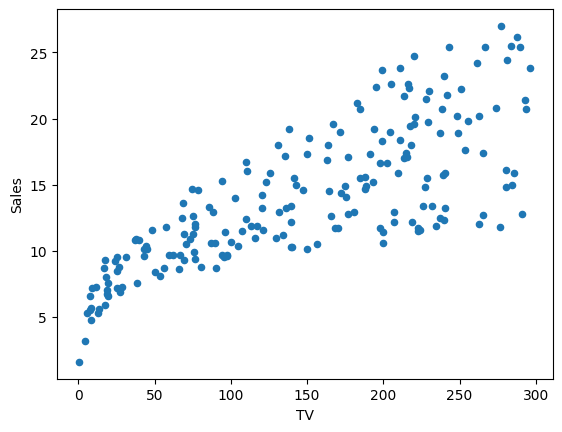

In [47]:
df.plot(kind='scatter',x='TV',y='Sales',colorbar=False)

<Axes: xlabel='Radio', ylabel='Sales'>

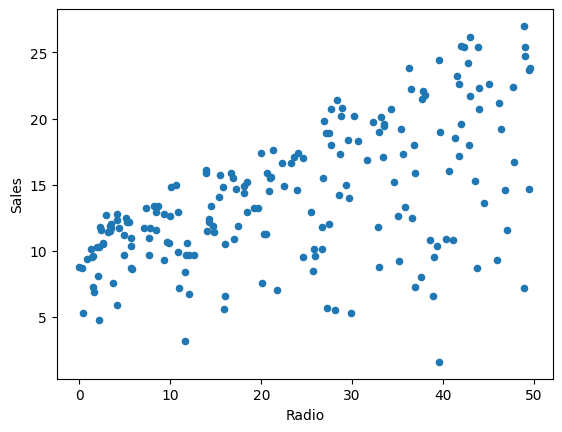

In [48]:
df.plot(kind='scatter',x='Radio',y='Sales',colorbar=False)

<Axes: xlabel='Newspaper', ylabel='Sales'>

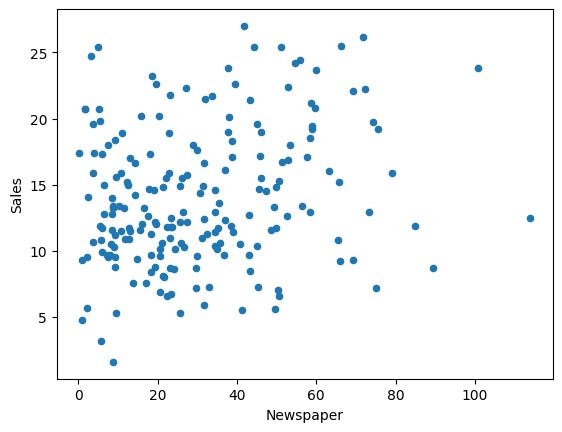

In [49]:
df.plot(kind='scatter',x='Newspaper',y='Sales',colorbar=False)

<Axes: >

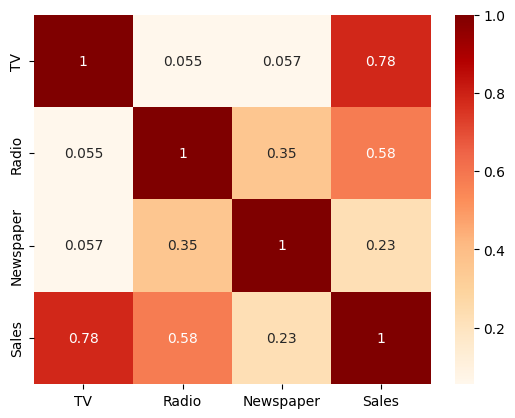

In [50]:
sns.heatmap(df.corr(),annot=True,cmap='OrRd')

In [51]:
X=df.drop('Sales',axis=1)
y=df['Sales']
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [52]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [53]:
X.head(2)

,TV,Radio,Newspaper
0,153,131,159
1,32,136,124


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [55]:
X_train.shape

(140, 3)

In [56]:
y_train.shape

(140,)

In [57]:
# Applying Linear regression model

Linmodel = LinearRegression()
Linmodel.fit(X_train,y_train)

LinearRegression()

In [58]:
y_pred = Linmodel.predict(X_test)

print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")

r2 Score of test set : 0.9065602546316336


In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_squared_error(y_test,y_pred)

88.68394783944959

In [60]:
Linmodel.score(X_test, y_test)

0.9065602546316336

In [61]:
print('Train data Accuracy is: ',Linmodel.score(X_train, y_train))

Train data Accuracy is:  0.9088980807271404


In [62]:
print('Test data Accuracy is: ',Linmodel.score(X_test, y_test))

Test data Accuracy is:  0.9065602546316336


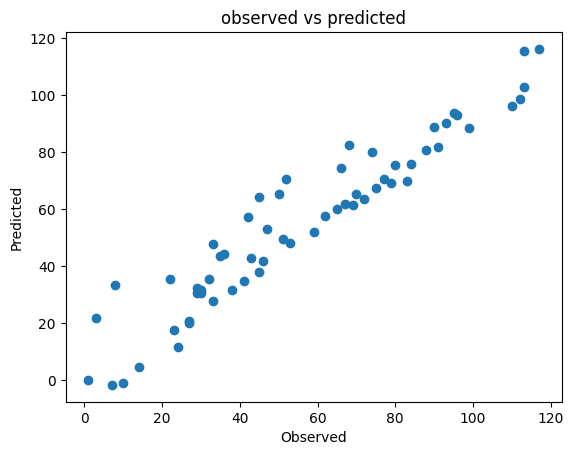

In [63]:
pred =  Linmodel.predict(X_test)


plt.scatter(y_test, pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('observed vs predicted')
plt.show()